In [92]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# 文字サイズ
plt.rcParams["font.size"] = 20

標準化なしの寄与率: [0.79192628 0.20807372]
標準化ありの寄与率: [0.79179675 0.20820325]


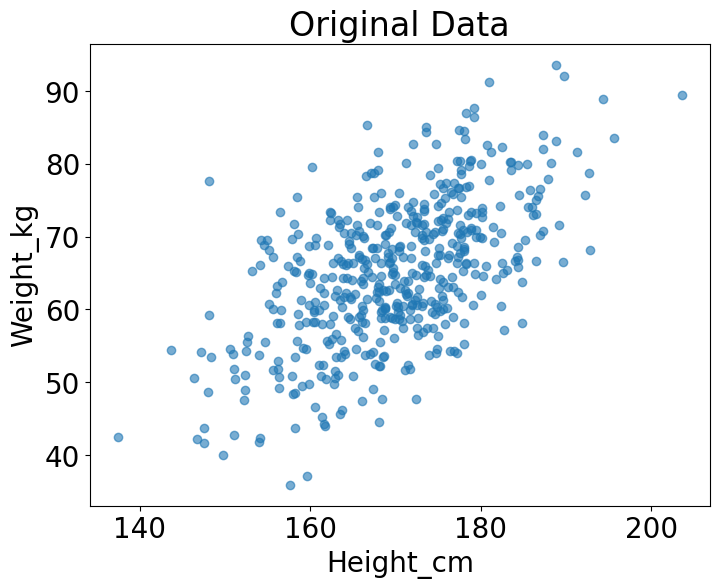

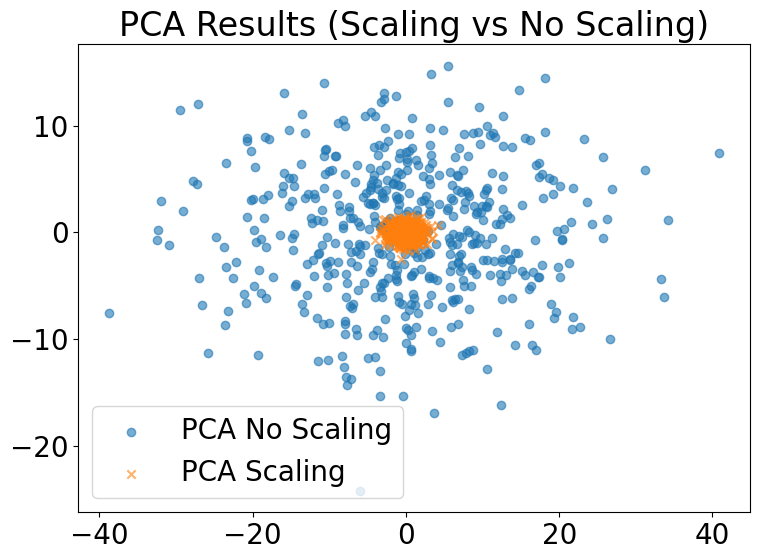

In [93]:

# データ生成：相関係数0.8を持つ2次元データ
mean = [170, 65]  # 平均値 [身長, 体重]
cov = [[100, 60], [60, 100]]  # 共分散行列（相関係数0.8）
np.random.seed(42)
height_weight_data = np.random.multivariate_normal(mean, cov, size=500)

# データフレーム化
df = pd.DataFrame(height_weight_data, columns=["Height_cm", "Weight_kg"])


# PCA（標準化なし）
pca_no_scaling = PCA()
pca_no_scaling_result = pca_no_scaling.fit_transform(df)

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# PCA（標準化あり）
pca_scaling = PCA()
pca_scaling_result = pca_scaling.fit_transform(data_scaled)

# 主成分の寄与率比較
print("標準化なしの寄与率:", pca_no_scaling.explained_variance_ratio_)
print("標準化ありの寄与率:", pca_scaling.explained_variance_ratio_)

# 可視化
plt.figure(figsize=(8, 6))

# オリジナルデータ
plt.scatter(df["Height_cm"], df["Weight_kg"], alpha=0.6, label="Original Data")
plt.title("Original Data")
plt.xlabel("Height_cm")
plt.ylabel("Weight_kg")


# PCA後のデータ
plt.figure(figsize=(8, 6))
plt.scatter(pca_no_scaling_result[:, 0], pca_no_scaling_result[:, 1], alpha=0.6, label="PCA No Scaling")
plt.scatter(pca_scaling_result[:, 0], pca_scaling_result[:, 1], alpha=0.6, label="PCA Scaling", marker="x")
plt.title("PCA Results (Scaling vs No Scaling)")
plt.legend()

plt.tight_layout()
plt.show()

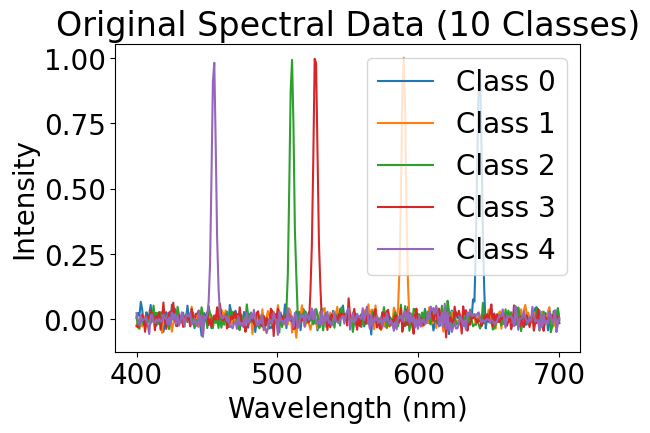

In [94]:
# スペクトルデータ生成：10種類の物質、それぞれ異なるピークを持つ
np.random.seed(4)
num_samples_per_class = 10
num_classes = 5
wavelengths = np.linspace(400, 700, 300)  # 300次元（波長の特徴量）

# 10種類の物質のスペクトルデータを作成
spectra = []
labels = []
for class_idx in range(num_classes):
    # 各物質のスペクトル：ピークの中心位置をランダムに設定
    peak_center = np.random.uniform(450, 650)  # ピークの中心波長
    spectrum = np.exp(-0.2 * (wavelengths - peak_center)**2)  # ガウス分布のピーク
    spectrum += np.random.normal(0, 0.01, len(wavelengths))  # ノイズ追加
    for _ in range(num_samples_per_class):
        # 同じ物質のサンプルに若干のバリエーションを加える
        variation = np.random.normal(0, 0.02, len(wavelengths))
        spectra.append(spectrum + variation)
        labels.append(class_idx)

# データフレーム化
spectra_df = pd.DataFrame(spectra, columns=[f"Wavelength_{int(w)}" for w in wavelengths])
spectra_df['Class'] = labels




# オリジナルのスペクトルデータを可視化
plt.figure(figsize=(6, 4))

for class_idx in range(num_classes):
    # 各クラスの代表的な1つのサンプルをプロット
    representative_spectrum = spectra_df[spectra_df['Class'] == class_idx].iloc[0, :-1]
    plt.plot(wavelengths, representative_spectrum, label=f"Class {class_idx}")

plt.title("Original Spectral Data (10 Classes)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend()
plt.show()



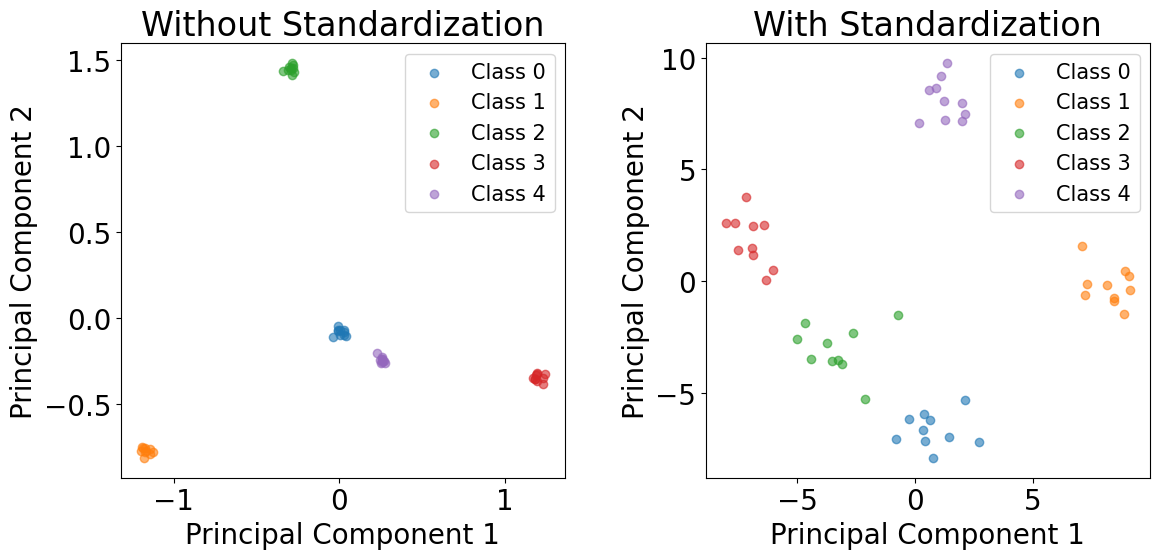

In [121]:
# PCAにかける（標準化なし）
pca_no_scaling = PCA(n_components=2)  # 2次元に圧縮
pca_no_scaling_result = pca_no_scaling.fit_transform(spectra_df.drop(columns=['Class']))

# 主成分データフレーム（標準化なし）
pca_no_scaling_df = pd.DataFrame(pca_no_scaling_result, columns=["PC1", "PC2"])
pca_no_scaling_df['Class'] = labels


# PCAにかける（標準化あり）
scaler = StandardScaler()
spectra_scaled = scaler.fit_transform(spectra_df.drop(columns=['Class']))
pca_scaling = PCA(n_components=2)  # 2次元に圧縮
pca_result = pca_scaling.fit_transform(spectra_scaled)
# 主成分データフレーム（標準化あり）
pca_scaling_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_scaling_df['Class'] = labels

# 標準化なしの結果をプロット
plt.figure(figsize=(12, 6))

# 標準化なし
plt.subplot(1, 2, 1)
for class_idx in range(num_classes):
    class_data = pca_no_scaling_df[pca_no_scaling_df['Class'] == class_idx]
    plt.scatter(class_data['PC1'], class_data['PC2'], label=f"Class {class_idx}", alpha=0.6)
plt.title("Without Standardization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(fontsize=15)

# 標準化あり
plt.subplot(1, 2, 2)
for class_idx in range(num_classes):
    class_data = pca_scaling_df[pca_scaling_df['Class'] == class_idx]
    plt.scatter(class_data['PC1'], class_data['PC2'], label=f"Class {class_idx}", alpha=0.6)
plt.title("With Standardization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(fontsize=15)

plt.tight_layout()
plt.savefig("pca_clastering.pdf", bbox_inches="tight")
plt.show()


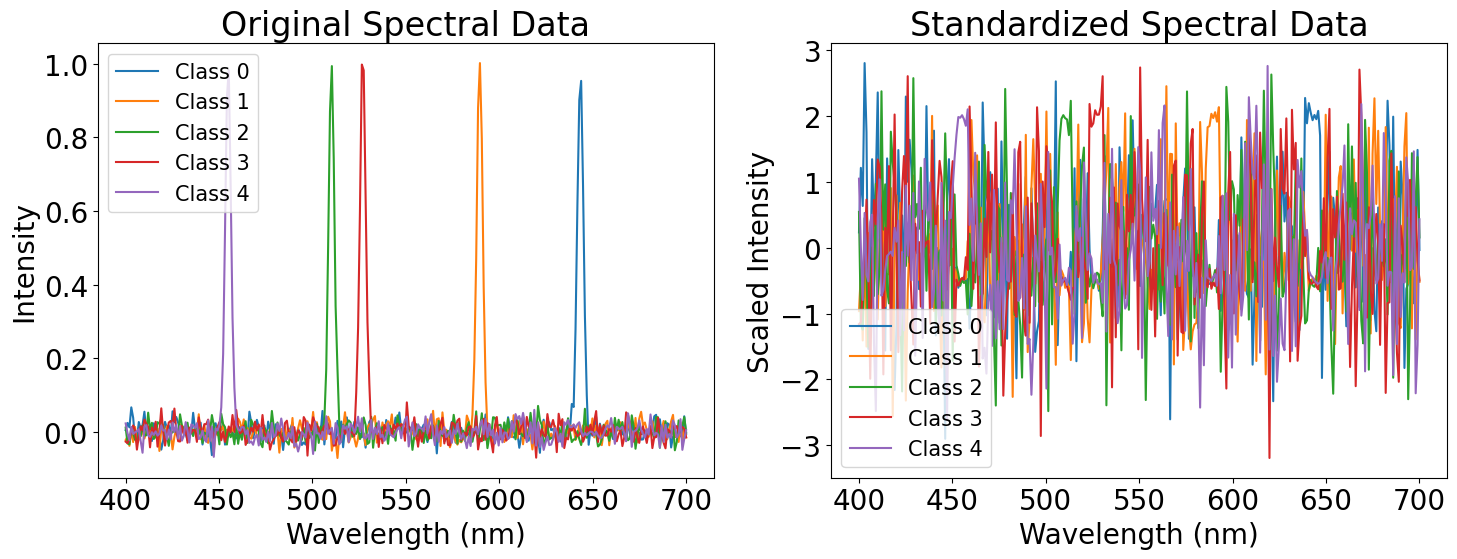

In [122]:
# 標準化されたデータをデータフレーム化
spectra_scaled_df = pd.DataFrame(spectra_scaled, columns=[f"Wavelength_{int(w)}" for w in wavelengths])
spectra_scaled_df['Class'] = labels

# 標準化前のオリジナルスペクトルデータを可視化
plt.figure(figsize=(15, 6))

# オリジナル
plt.subplot(1, 2, 1)
for class_idx in range(num_classes):
    representative_spectrum = spectra_df[spectra_df['Class'] == class_idx].iloc[0, :-1]
    plt.plot(wavelengths, representative_spectrum, label=f"Class {class_idx}")
plt.title("Original Spectral Data")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend(fontsize=15)

# 標準化後
plt.subplot(1, 2, 2)
for class_idx in range(num_classes):
    representative_spectrum_scaled = spectra_scaled_df[spectra_scaled_df['Class'] == class_idx].iloc[0, :-1]
    plt.plot(wavelengths, representative_spectrum_scaled, label=f"Class {class_idx}")
plt.title("Standardized Spectral Data")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Scaled Intensity")
plt.legend(fontsize=15, loc="best")


plt.tight_layout()
plt.savefig("spectral_data_scaling.pdf", bbox_inches="tight")
plt.show()

In [103]:
# 累積寄与率の計算
explained_variance_ratio_no_scaling = pca_no_scaling.explained_variance_ratio_
cumulative_variance_no_scaling = np.cumsum(explained_variance_ratio_no_scaling)

explained_variance_ratio_scaling = pca_scaling.explained_variance_ratio_
cumulative_variance_scaling = np.cumsum(explained_variance_ratio_scaling)

cumulative_variance_no_scaling, cumulative_variance_scaling

(array([0.24712975, 0.48895392]), array([0.08963999, 0.17473178]))

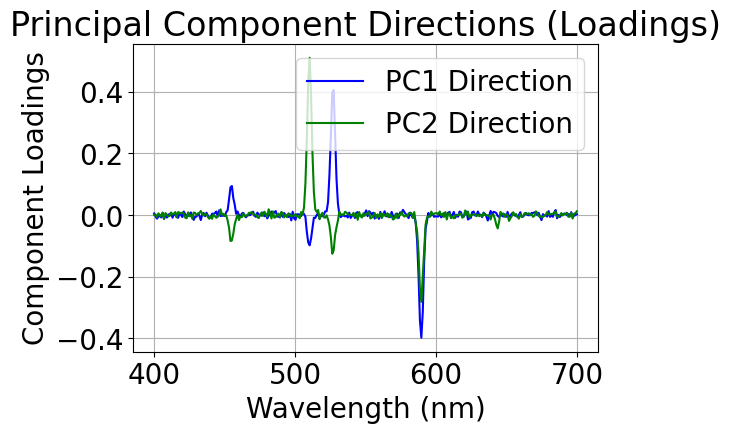

In [104]:
components = pca_no_scaling.components_  # 主成分の係数（負荷量）

# 主成分方向を図示（PC1とPC2）
plt.figure(figsize=(6, 4))

plt.plot(wavelengths, components[0], label="PC1 Direction", color='blue')  # 主成分1
plt.plot(wavelengths, components[1], label="PC2 Direction", color='green')  # 主成分2

plt.title("Principal Component Directions (Loadings)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Component Loadings")
plt.legend()
plt.grid(True)
plt.show()

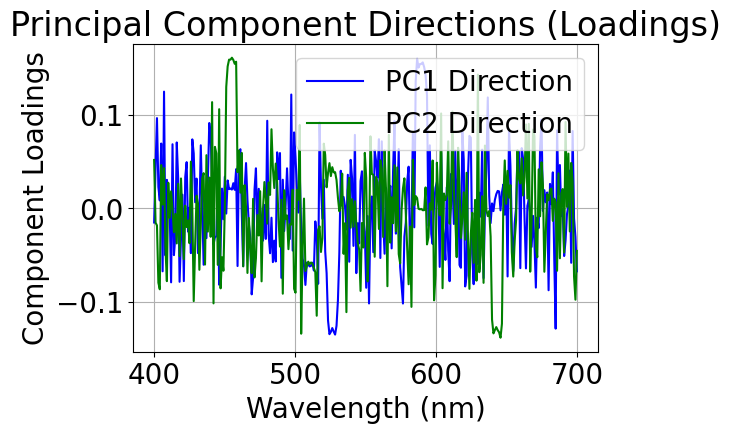

In [106]:


components = pca_scaling.components_  # 主成分の係数（負荷量）

# 主成分方向を図示（PC1とPC2）
plt.figure(figsize=(6, 4))

plt.plot(wavelengths, components[0], label="PC1 Direction", color='blue')  # 主成分1
plt.plot(wavelengths, components[1], label="PC2 Direction", color='green')  # 主成分2

plt.title("Principal Component Directions (Loadings)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Component Loadings")
plt.legend()
plt.grid(True)
plt.show()

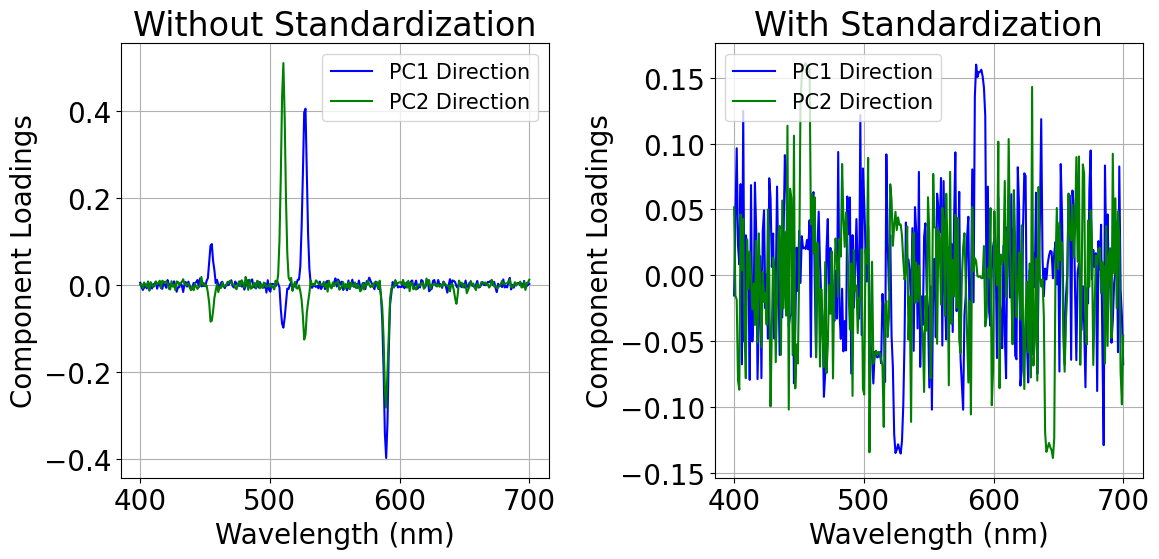

In [123]:
# 主成分方向をプロット（標準化なしとありをsubplotで並べる）
components_no_scaling = pca_no_scaling.components_  # 標準化なし
components_scaling = pca_scaling.components_  # 標準化あり

plt.figure(figsize=(12, 6))

# 標準化なし
plt.subplot(1, 2, 1)
plt.plot(wavelengths, components_no_scaling[0], label="PC1 Direction", color='blue')  # 主成分1
plt.plot(wavelengths, components_no_scaling[1], label="PC2 Direction", color='green')  # 主成分2
plt.title("Without Standardization")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Component Loadings")
plt.legend(fontsize=15)
plt.grid(True)

# 標準化あり
plt.subplot(1, 2, 2)
plt.plot(wavelengths, components_scaling[0], label="PC1 Direction", color='blue')  # 主成分1
plt.plot(wavelengths, components_scaling[1], label="PC2 Direction", color='green')  # 主成分2
plt.title("With Standardization")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Component Loadings")
plt.legend(fontsize=15)
plt.grid(True)

plt.tight_layout()
plt.savefig("pca_loadings.pdf", bbox_inches="tight")
plt.show()